In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="J1mmAuxLk77g4eiOvCmr")
project = rf.workspace("ml-datatrain").project("572_fruits_vegetables")
version = project.version(1)
dataset = version.download("yolov9")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 87.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30


Extracting Dataset Version Zip to 572_FRUITS_VEGETABLES-1 in yolov9:: 100%|██████████| 22990/22990 [00:02<00:00, 8874.86it/s] 


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.204 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6411.6/8062.4 GB disk)


In [4]:
from ultralytics import YOLO

# Load a pre-trained YOLOv9 small model (if available)
model = YOLO('yolov9s.pt')


In [5]:
import os
from sklearn.model_selection import train_test_split

import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import yaml
from PIL import Image

In [6]:
import os
import yaml

# Path to your downloaded dataset folder
dataset_path = "/kaggle/working/572_FRUITS_VEGETABLES-1/" 

# Load class names from data.yaml
with open(os.path.join(dataset_path, "data.yaml"), "r") as f:
    data = yaml.safe_load(f)

class_names = data['names']
print(f"Number of classes: {len(class_names)}")
print("Classes:", class_names)

def count_labels_in_folder(labels_folder):
    counts = [0] * len(class_names)
    for label_file in os.listdir(labels_folder):
        if label_file.endswith(".txt"):
            with open(os.path.join(labels_folder, label_file), 'r') as f:
                lines = f.readlines()
                for line in lines:
                    class_id = int(line.split()[0])
                    counts[class_id] += 1
    return counts

# Count labels in train and valid sets
train_labels_folder = os.path.join(dataset_path, "train", "labels")
test_labels_folder = os.path.join(dataset_path, "test", "labels")
valid_labels_folder = os.path.join(dataset_path, "valid", "labels")

train_counts = count_labels_in_folder(train_labels_folder)
test_counts = count_labels_in_folder(test_labels_folder)
valid_counts = count_labels_in_folder(valid_labels_folder)

print("\nImage counts:")
print(f"Train images: {len(os.listdir(os.path.join(dataset_path, 'train', 'images')))}")
print(f"Test images: {len(os.listdir(os.path.join(dataset_path, 'test', 'images')))}")
print(f"Validation images: {len(os.listdir(os.path.join(dataset_path, 'valid', 'images')))}")

print("\nLabel counts per class:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: Train = {train_counts[i]}, Test = {test_counts[i]}, Valid = {valid_counts[i]}")


Number of classes: 32
Classes: ['Bitter melon', 'Brinjal', 'Cabbage', 'Calabash', 'Capsicum', 'Cauliflower', 'Cherry', 'Garlic', 'Ginger', 'Green Chili', 'Kiwi', 'Lady finger', 'Onion', 'Potato', 'Sponge Gourd', 'Tomato', 'apple', 'avocado', 'banana', 'cucumber', 'dragon fruit', 'egg', 'guava', 'mango', 'orange', 'oren', 'peach', 'pear', 'pineapple', 'strawberry', 'sugar apple', 'watermelon']

Image counts:
Train images: 9048
Test images: 1397
Validation images: 1044

Label counts per class:
Bitter melon: Train = 270, Test = 57, Valid = 28
Brinjal: Train = 176, Test = 21, Valid = 29
Cabbage: Train = 150, Test = 20, Valid = 20
Calabash: Train = 142, Test = 19, Valid = 18
Capsicum: Train = 284, Test = 18, Valid = 34
Cauliflower: Train = 172, Test = 26, Valid = 23
Cherry: Train = 4029, Test = 689, Valid = 292
Garlic: Train = 406, Test = 45, Valid = 57
Ginger: Train = 122, Test = 22, Valid = 17
Green Chili: Train = 418, Test = 65, Valid = 60
Kiwi: Train = 690, Test = 97, Valid = 68
Lady fi

Train dataset has 9048 images.


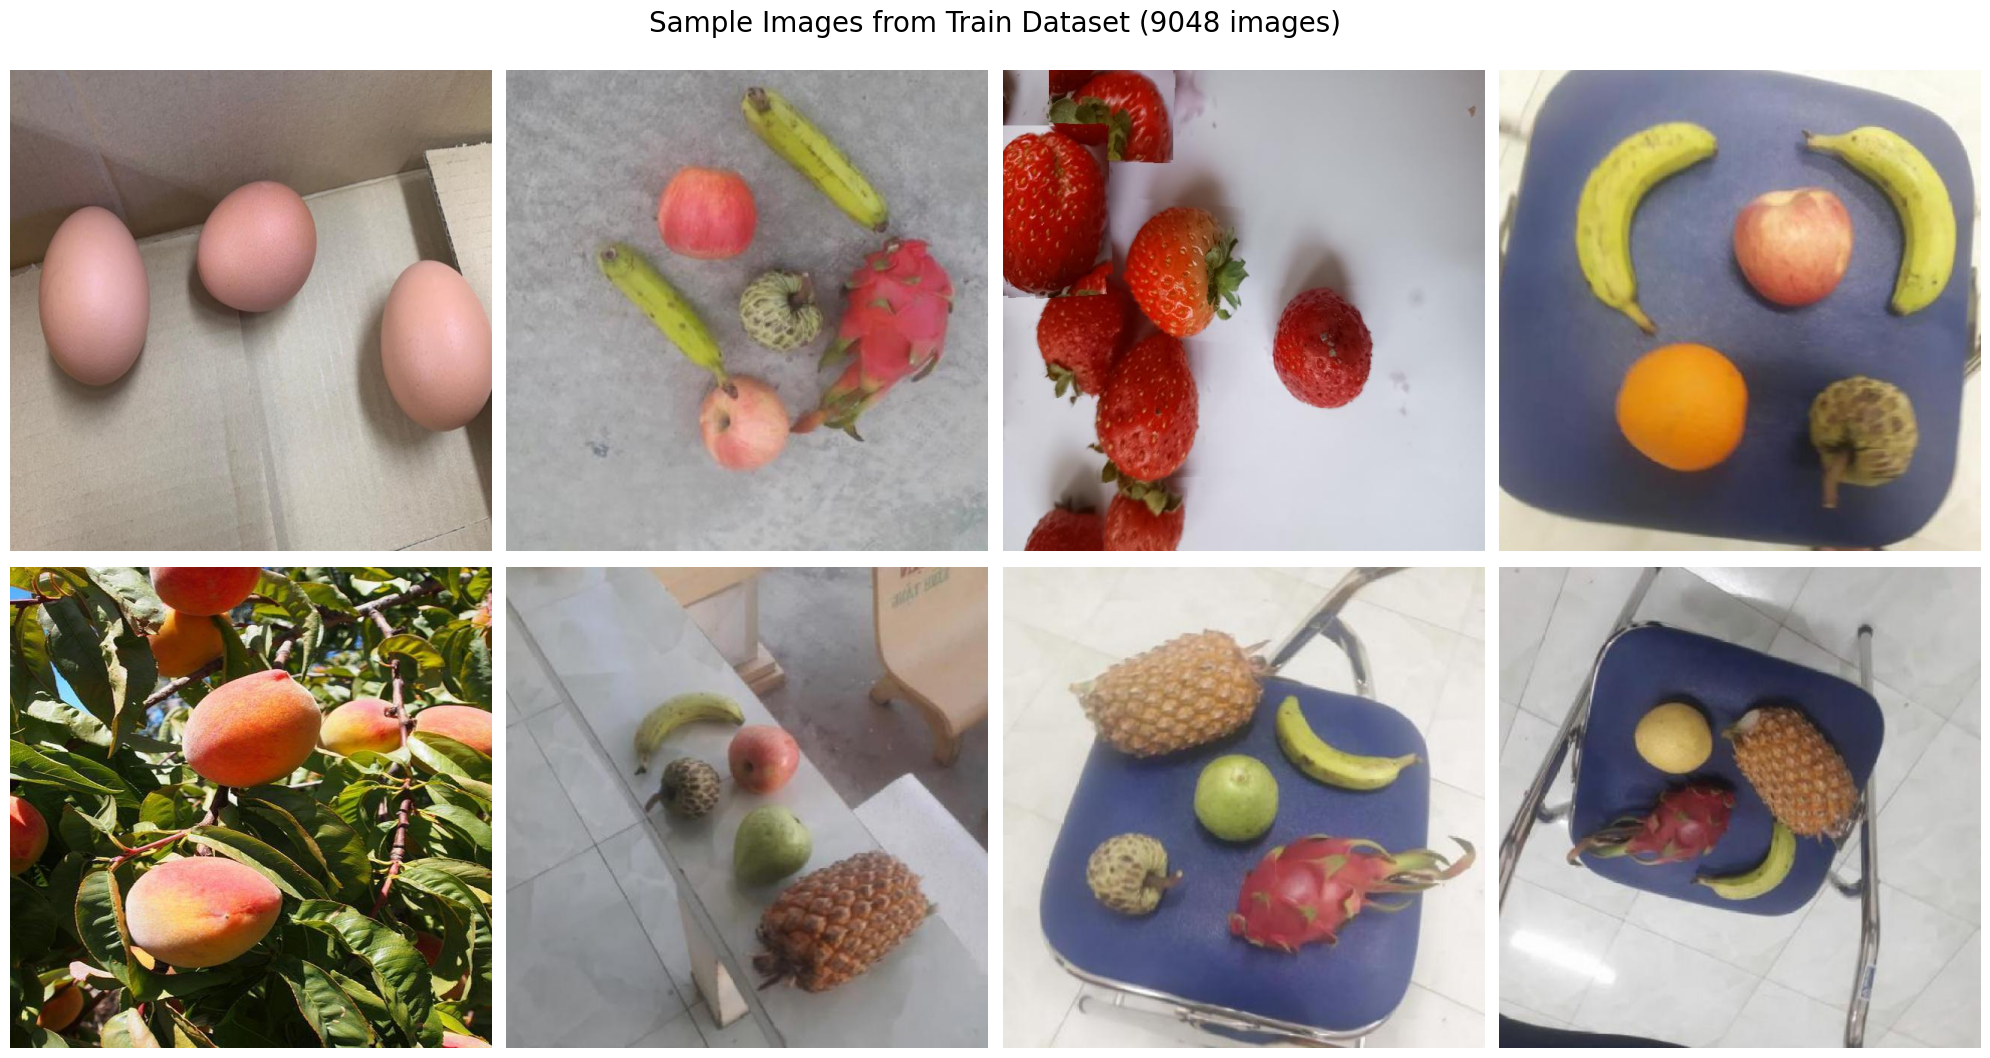

Test dataset has 1397 images.


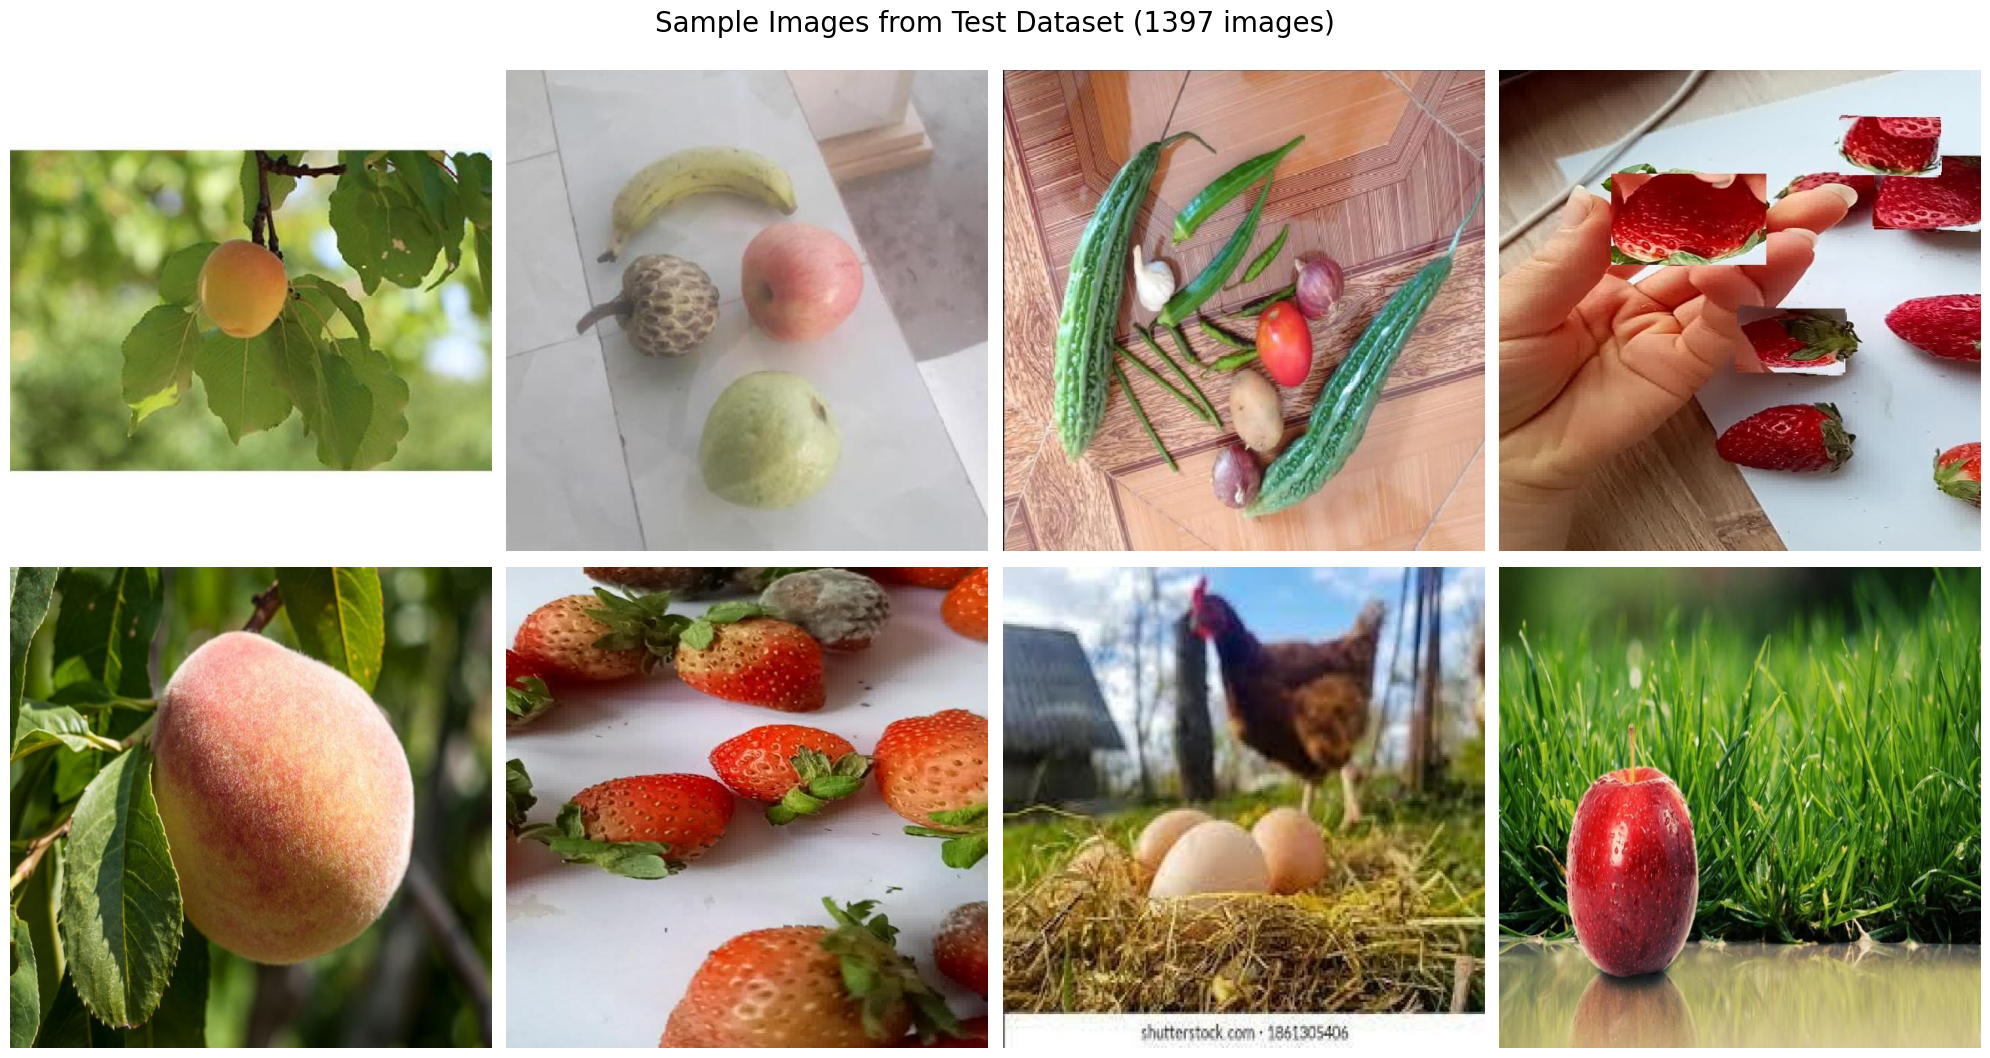

Val dataset has 1044 images.


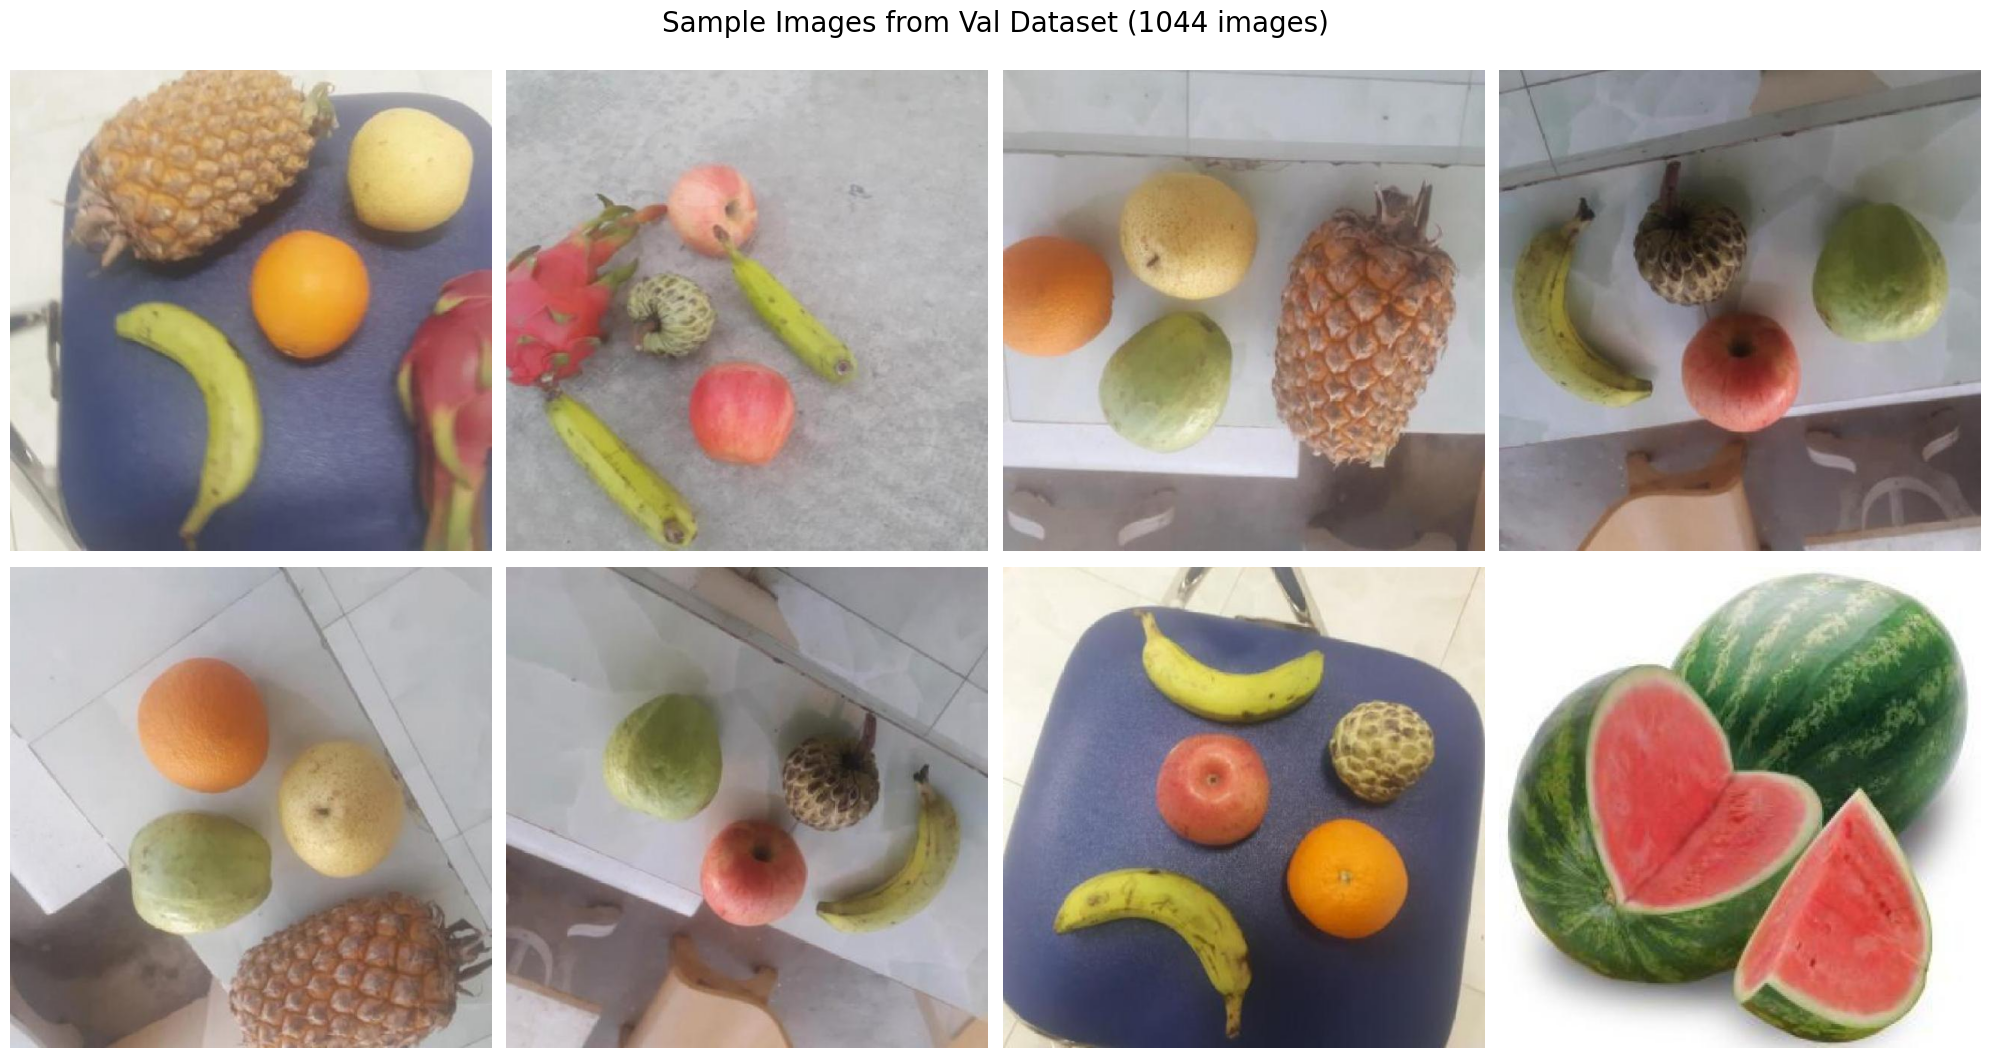

In [7]:
# Define the base paths for each dataset type
dataset_paths = {
    'train': '/kaggle/working/572_FRUITS_VEGETABLES-1/train/images',
    'test': '/kaggle/working/572_FRUITS_VEGETABLES-1/test/images',
    'val' : '/kaggle/working/572_FRUITS_VEGETABLES-1/valid/images'
}
num_samples = 30
for dataset_name, image_folder in dataset_paths.items():
    if not os.path.isdir(image_folder):
        print(f"Directory {image_folder} does not exist.")
        continue
    image_files = [file for file in os.listdir(image_folder) if file.endswith('.jpg')]
    image_count = len(image_files)
    print(f"{dataset_name.capitalize()} dataset has {image_count} images.")
    if not image_files:
        print(f"No .jpg images found in the {image_folder} directory.")
        continue
    interval = max(1, image_count // num_samples)  
    selected_images = [image_files[i] for i in range(0, image_count, interval)][:num_samples] 

    # Create a 2x4 subplot for displaying 8 images
    fig, axes = plt.subplots(2, 4, figsize=(20, 11))

    # Display each of the selected images
    for ax, img_file in zip(axes.ravel(), selected_images):
        img_path = os.path.join(image_folder, img_file)
        image = Image.open(img_path)
        ax.imshow(image)
        ax.axis('off')  # Hide axis

    # Set the title for each dataset, including the count of images
    plt.suptitle(f'Sample Images from {dataset_name.capitalize()} Dataset ({image_count} images)', fontsize=20)
    plt.tight_layout()
    plt.show()


In [8]:
import yaml

yaml_path = "/kaggle/working/572_FRUITS_VEGETABLES-1/data.yaml"

with open(yaml_path, 'r') as file:
    content = yaml.safe_load(file)

print(content)

{'names': ['Bitter melon', 'Brinjal', 'Cabbage', 'Calabash', 'Capsicum', 'Cauliflower', 'Cherry', 'Garlic', 'Ginger', 'Green Chili', 'Kiwi', 'Lady finger', 'Onion', 'Potato', 'Sponge Gourd', 'Tomato', 'apple', 'avocado', 'banana', 'cucumber', 'dragon fruit', 'egg', 'guava', 'mango', 'orange', 'oren', 'peach', 'pear', 'pineapple', 'strawberry', 'sugar apple', 'watermelon'], 'nc': 32, 'roboflow': {'license': 'MIT', 'project': '572_fruits_vegetables', 'url': 'https://universe.roboflow.com/ml-datatrain/572_fruits_vegetables/dataset/1', 'version': 1, 'workspace': 'ml-datatrain'}, 'test': '../test/images', 'train': '../train/images', 'val': '../valid/images'}


In [9]:
!yolo task=detect  mode=train data=/kaggle/working/572_FRUITS_VEGETABLES-1/data.yaml model=yolov9s.pt epochs=40 imgsz=650 batch=16

Ultralytics 8.3.204 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/572_FRUITS_VEGETABLES-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=650, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov9s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pe

In [10]:
import zipfile
import os

def zip_directory(folder_path, zip_path):
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                # Store the file in the zip with a path relative to the folder
                arcname = os.path.relpath(file_path, os.path.dirname(folder_path))
                zipf.write(file_path, arcname)

# Define paths
folder_to_zip = '/kaggle/working/runs/detect/train'
output_zip = '/kaggle/working/train.zip'

# Zip the directory
zip_directory(folder_to_zip, output_zip)
print(f"Directory {folder_to_zip} has been zipped to {output_zip}")


Directory /kaggle/working/runs/detect/train has been zipped to /kaggle/working/train.zip


In [11]:
# import cv2
# import matplotlib.pyplot as plt
# from ultralytics import YOLO

# # Load the trained model
# model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')  
# image_path = ''  

# # Make predictions on the image without saving the output
# results = model.predict(image_path, 
#                         conf=0.25,        # Confidence threshold (default: 0.25)
#                         iou=0.45,         # Intersection over Union threshold (default: 0.45)
#                         save=False,       # Do not save the predicted image to disk
#                         show=False)       # Don't show via YOLO directly

# # Access the image with predictions directly from the results
# img_with_predictions = results[0].plot()

# # Display the image using matplotlib in the notebook
# plt.figure(figsize=(10, 10))
# plt.imshow(cv2.cvtColor(img_with_predictions, cv2.COLOR_BGR2RGB))  
# plt.axis('off') 
# plt.show()


In [12]:
import os
# Define the path to the directory
post_training_files_path = '/kaggle/working/runs/detect/train'
#E:/yolo/runs/detect/train
files =os.listdir(post_training_files_path)
for file in files:
    print(file)

train_batch16982.jpg
train_batch1.jpg
train_batch16981.jpg
train_batch2.jpg
weights
BoxR_curve.png
args.yaml
labels.jpg
confusion_matrix_normalized.png
val_batch0_labels.jpg
train_batch0.jpg
val_batch2_pred.jpg
val_batch2_labels.jpg
results.csv
BoxPR_curve.png
BoxF1_curve.png
confusion_matrix.png
val_batch1_pred.jpg
val_batch1_labels.jpg
train_batch16980.jpg
results.png
val_batch0_pred.jpg
BoxP_curve.png


In [13]:
# Define a function to plot learning curves for loss values
def plot_learning_curve(df, train_loss_col, val_loss_col, title):
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='#141140', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='orangered', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


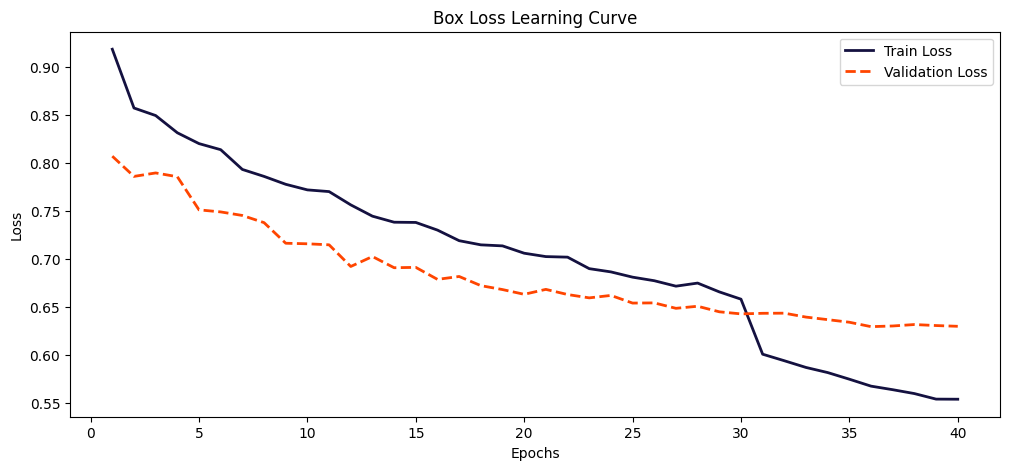

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


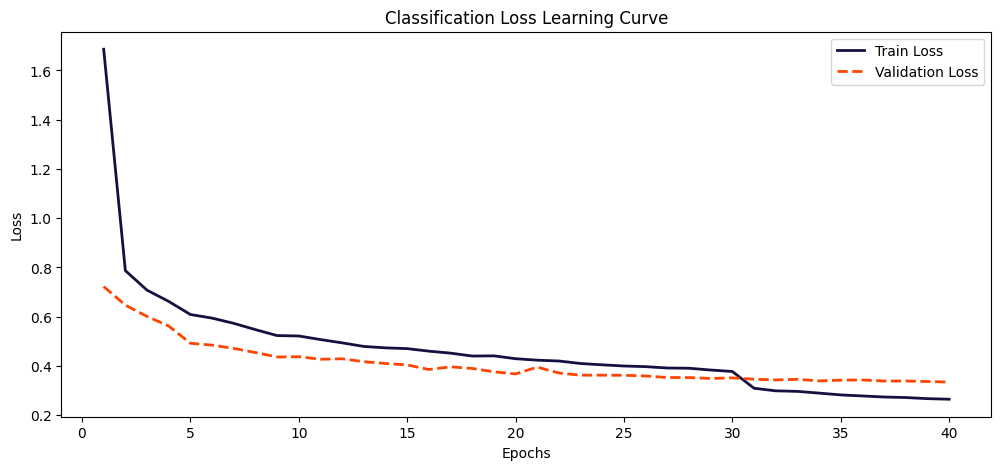

In [14]:
import pandas as pd
# Create the full file path for 'results.csv' using the directory path and file name
results_csv_path = os.path.join(post_training_files_path, 'results.csv')

# Load the CSV file from the constructed path into a pandas DataFrame
df = pd.read_csv(results_csv_path)

# Remove any leading whitespace from the column names
df.columns = df.columns.str.strip()

# Plot the learning curves for each loss
plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Box Loss Learning Curve')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')